In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("vgsales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df.fillna(df.mode(),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

In [7]:
numerical_col=df.select_dtypes(include=['int64','float64']).columns
categorical_col=df.select_dtypes(include=['object']).columns
numerical_col

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [8]:
categorical_col

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

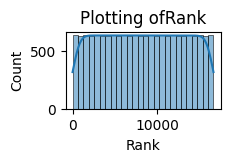

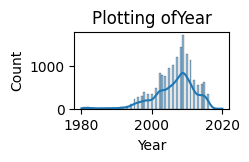

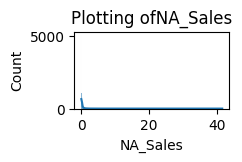

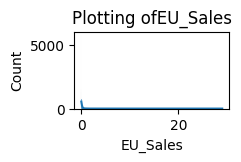

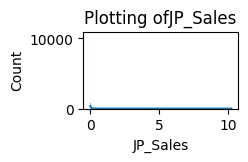

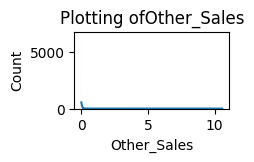

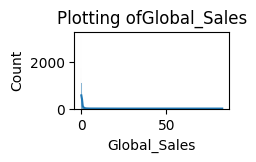

In [9]:
for col in numerical_col:
    plt.figure(figsize=(2,1))
    sns.histplot(df[col],kde=True)
    plt.title(f'Plotting of{col}')

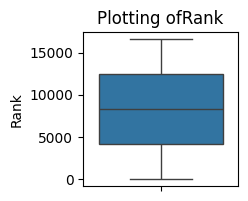

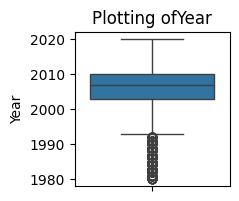

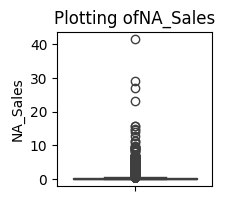

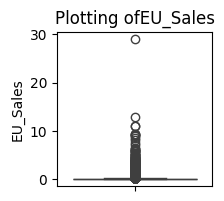

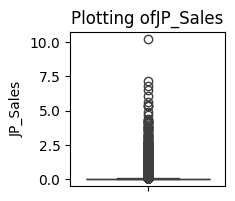

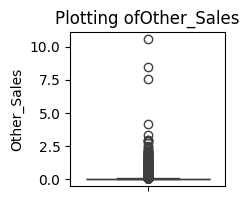

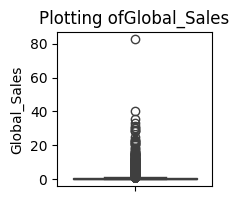

In [10]:
for col in numerical_col:
    plt.figure(figsize=(2,2))
    sns.boxplot(df[col])
    plt.title(f'Plotting of{col}')

In [11]:
df[categorical_col].nunique()

,0
Name,11493
Platform,31
Genre,12
Publisher,578


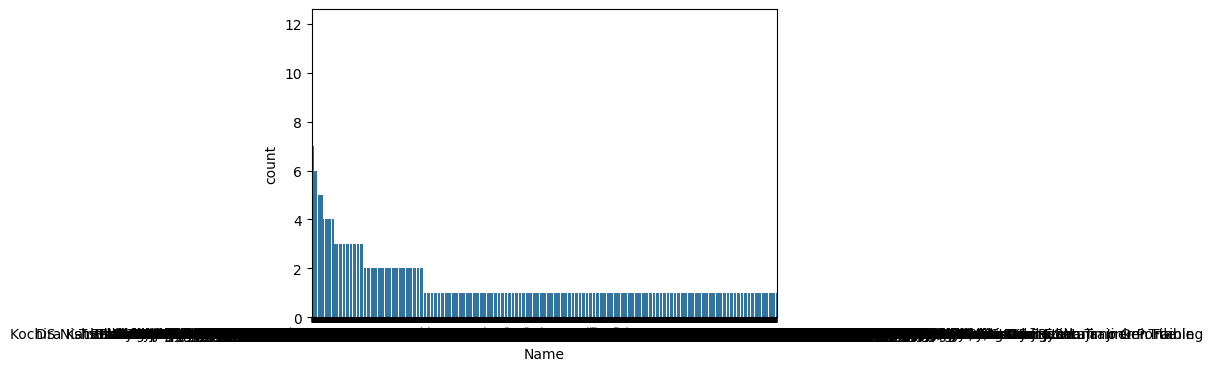

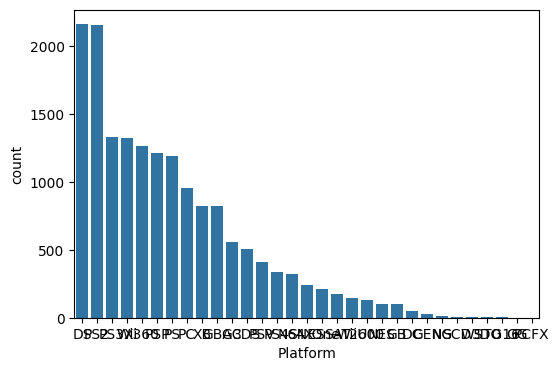

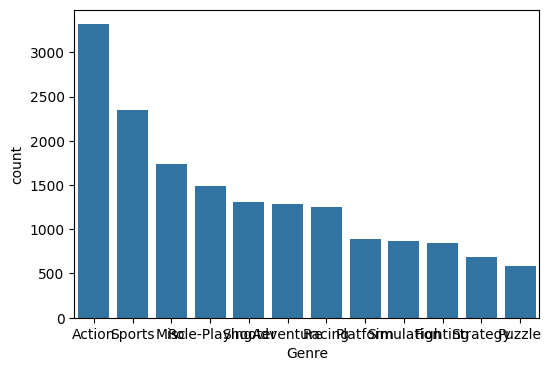

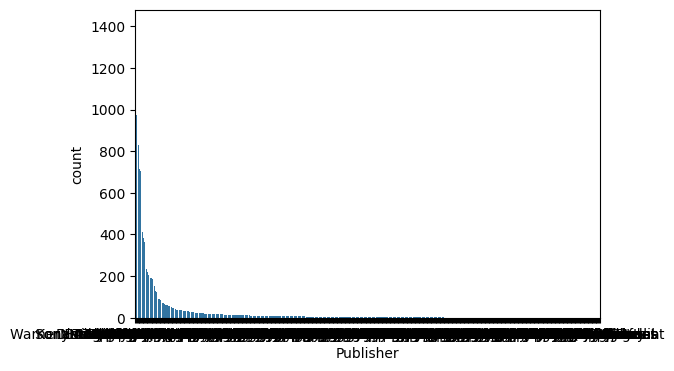

In [12]:
for col in categorical_col:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col],order=df[col].value_counts().index)
    plt.show()

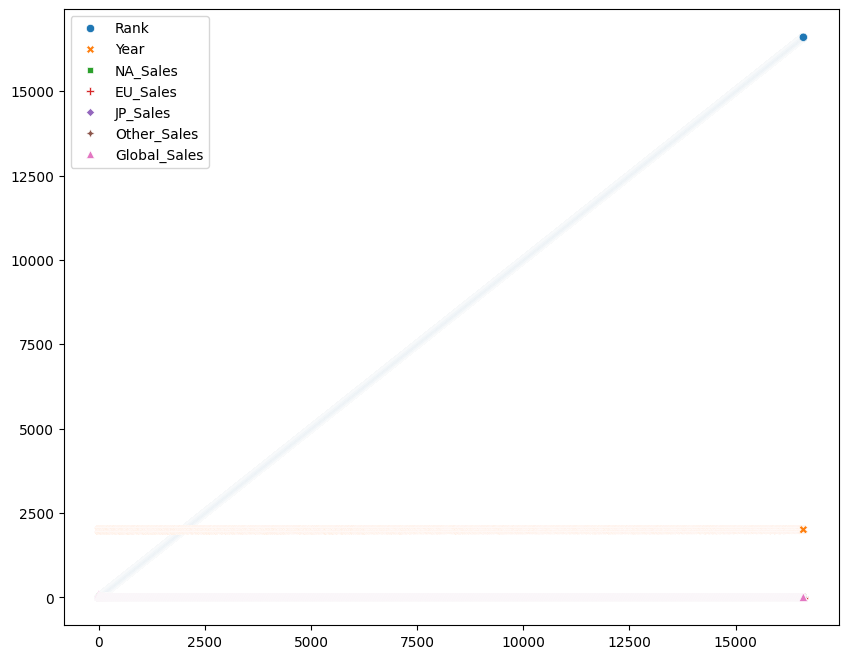

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(df[numerical_col])
plt.show()

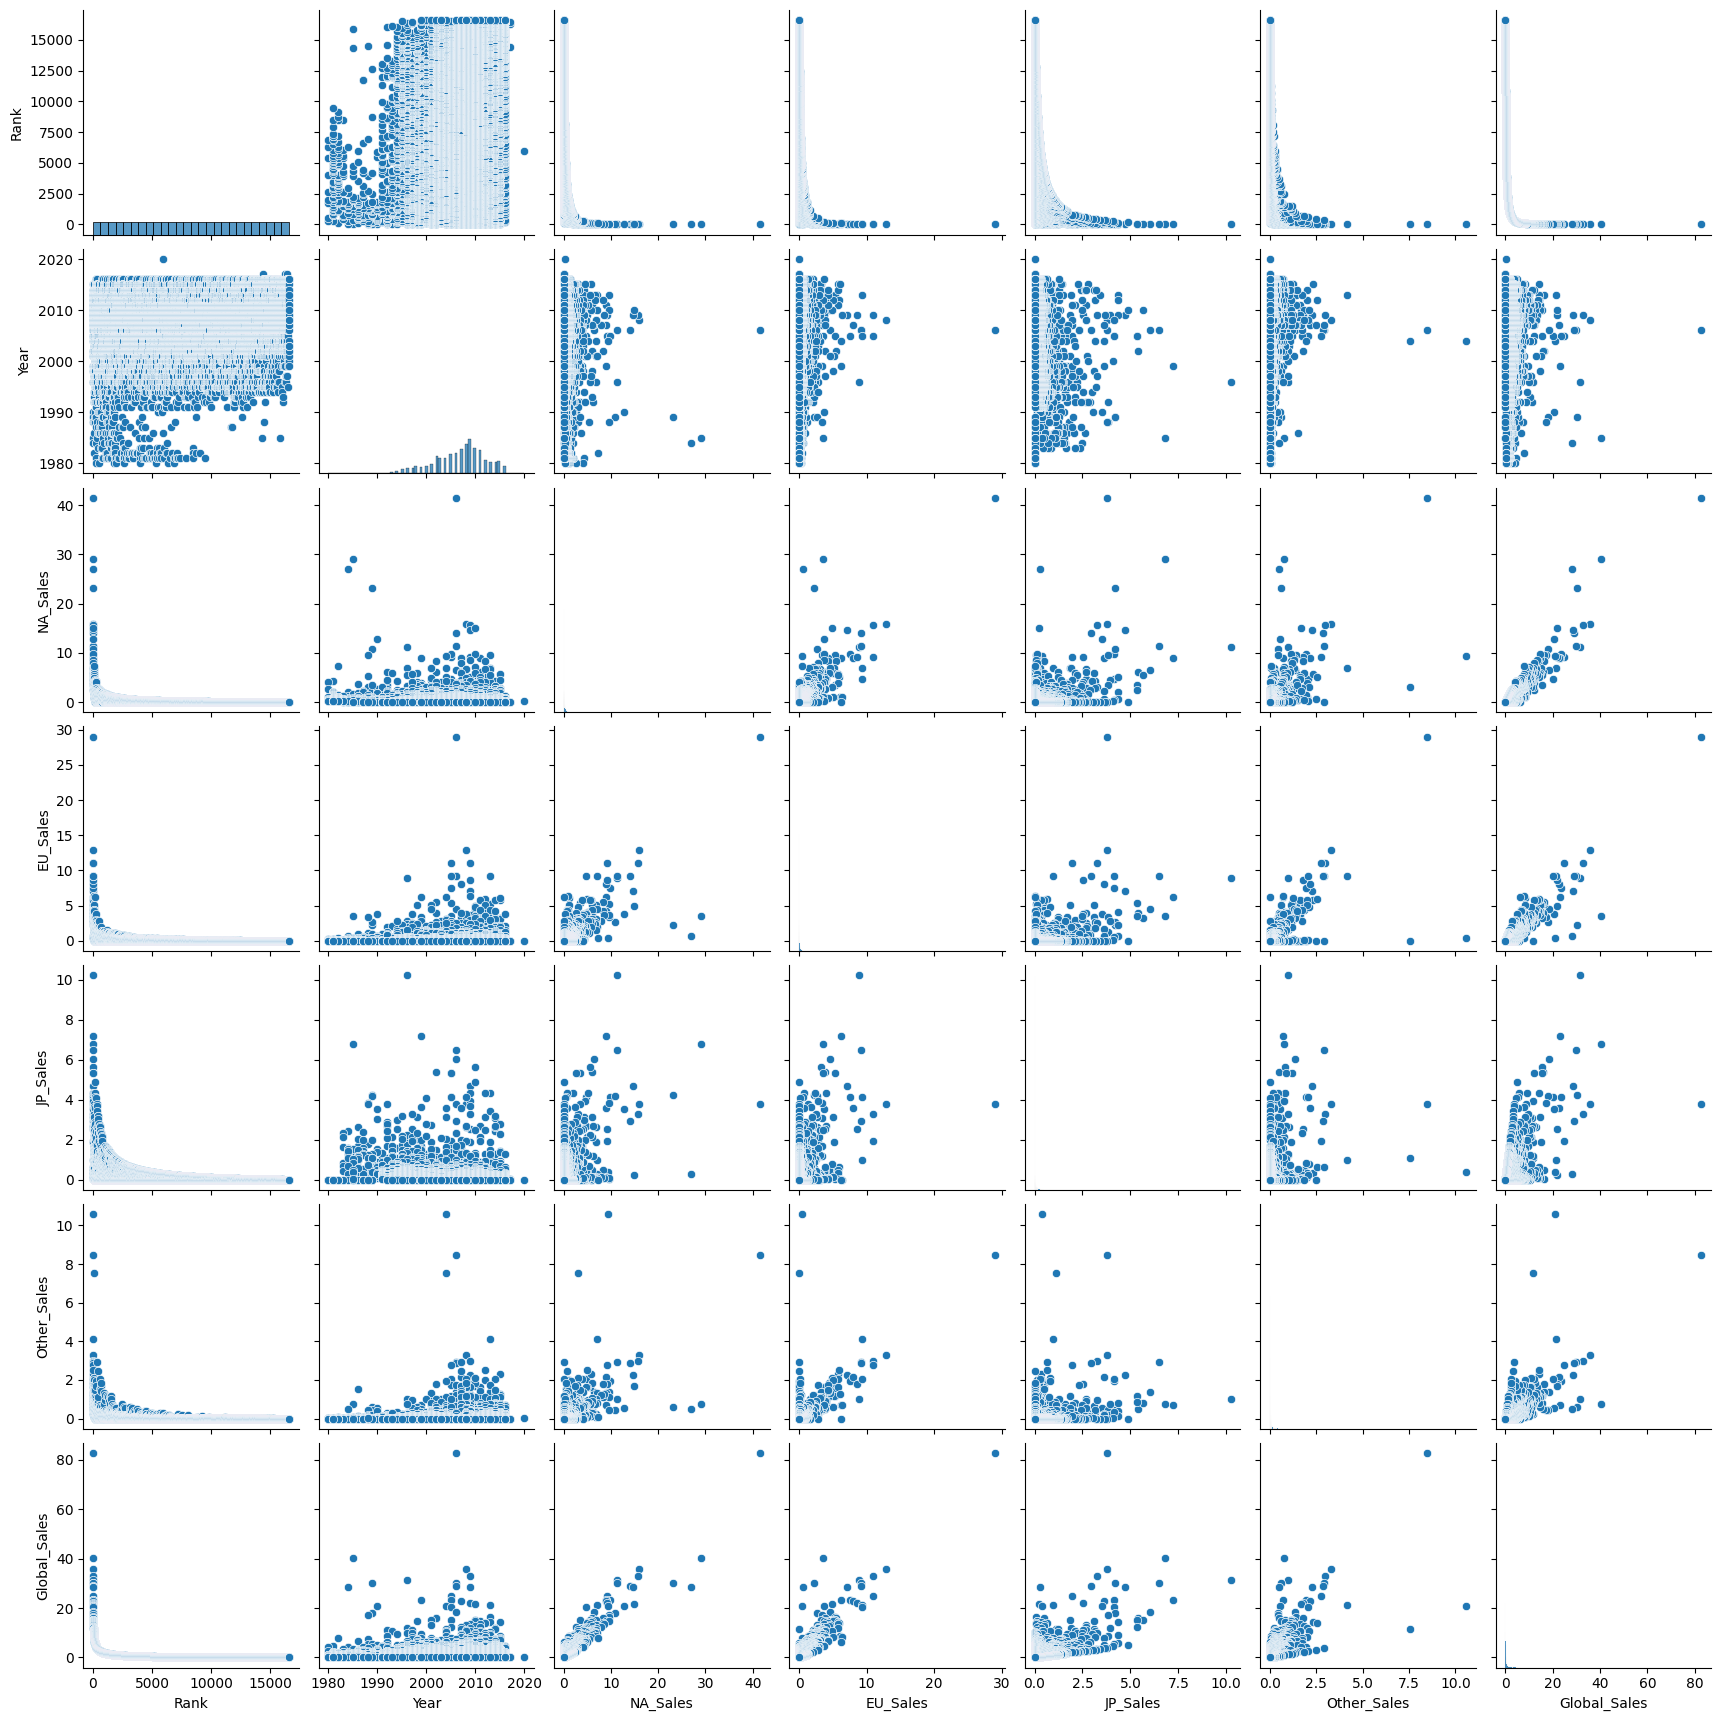

In [14]:
sns.pairplot(df[numerical_col])
plt.show()

In [15]:
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_col] < (Q1 - 1.5 * IQR)) | (df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
print(Q1)

print(Q3)

print(IQR)

Rank            4151.25
Year            2003.00
NA_Sales           0.00
EU_Sales           0.00
JP_Sales           0.00
Other_Sales        0.00
Global_Sales       0.06
Name: 0.25, dtype: float64
Rank            12449.75
Year             2010.00
NA_Sales            0.24
EU_Sales            0.11
JP_Sales            0.04
Other_Sales         0.04
Global_Sales        0.47
Name: 0.75, dtype: float64
Rank            8298.50
Year               7.00
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.41
dtype: float64


In [17]:
df.to_csv('AFter_Analysis_dataset.csv',index=False)